#Life Expectancy using Linear Regression
#### prepared by Pang Zheng Beng, Marcus Kiong Chuan, Lee Cheng Zhan

Data source: https://kaggle.com/kumarajarshi/life-expectancy-who

This report aims to model a multilinear regression to predict the life expectancy in a country based on given factors from the data. 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot

In [ ]:
sns.set(rc={'figure.figsize':(16,12)})
sns.set_style('whitegrid')

In [ ]:
file ="Life Expectancy.csv"

In [ ]:
df = pd.read_csv(file)
df.sample(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
951,Gabon,2010,Developing,62.3,294.0,2,8.85,145.318282,67.0,1,33.5,3,68.0,3.41,67.0,7.0,8754.113376,16421.0,6.5,6.4,0.660,12.5
2892,Yemen,2013,Developing,65.4,226.0,36,0.04,0.000000,73.0,400,39.6,46,67.0,5.78,73.0,0.1,NaN,NaN,13.7,13.5,0.498,9.0
190,Bahrain,2001,Developing,74.7,9.0,0,1.95,1150.418063,99.0,5,54.8,0,99.0,3.80,99.0,0.1,12868.211000,NaN,6.2,6.0,0.794,13.3
345,Botswana,2006,Developing,54.8,491.0,2,6.45,76.318679,93.0,6,33.2,3,96.0,4.93,96.0,14.4,5374.554867,1884238.0,9.6,9.4,0.610,11.9
2172,Saint Lucia,2011,Developing,74.6,143.0,0,10.43,0.000000,99.0,0,44.5,0,99.0,7.58,99.0,0.1,NaN,NaN,4.3,4.3,0.733,12.9


In [ ]:
df.shape

(2938, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

For our model, we have decided to subset the data based on more recent years (2011 to 2015).


In [ ]:
# Only year 2011-2015 is taken
new = df["Year"].isin(["2011","2012","2013","2014","2015"])
new_df = df[new]

In [ ]:
new_df.shape

(925, 22)

In [ ]:
null_columns=new_df.columns[new_df.isnull().any()]
new_df[null_columns].isnull().sum()

Life expectancy                     10
Adult Mortality                     10
Alcohol                            182
Hepatitis B                         56
 BMI                                12
Total expenditure                  190
GDP                                146
Population                         212
 thinness  1-19 years               12
 thinness 5-9 years                 12
Income composition of resources     57
Schooling                           53
dtype: int64

We can see that columns 'Alcohol', 'Total expenditure', 'GDP', 'Population' contain many null values which would not contribute well to our modelling. Thus, we have decided to ignore them in our variable selection later.

For the rest of the columns with null values, we fill in the null values with the mean of the data in the column. All these columns are float64 type data, so there are no problems with decimal values, as opposed to integer data.

In [ ]:
new_df['Life expectancy']=new_df['Life expectancy'].fillna(value=new_df['Life expectancy'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
new_df['Adult Mortality']=new_df['Adult Mortality'].fillna(value=new_df['Adult Mortality'].mean())
new_df[' BMI']=new_df[' BMI'].fillna(value=new_df[' BMI'].mean())
new_df['Hepatitis B']=new_df['Hepatitis B'].fillna(value=new_df['Hepatitis B'].mean())
new_df['Income composition of resources']=new_df['Income composition of resources'].fillna(value=new_df['Income composition of resources'].mean())
new_df['thinness 5-9 years']=new_df['thinness 5-9 years'].fillna(value=new_df['thinness 5-9 years'].mean())
new_df['thinness  1-19 years']=new_df['thinness  1-19 years'].fillna(value=new_df['thinness  1-19 years'].mean())                

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
new_df['Schooling']=new_df['Schooling'].fillna(value=new_df['Schooling'].mean())     

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 925 entries, 0 to 2926
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          925 non-null    object 
 1   Year                             925 non-null    int64  
 2   Status                           925 non-null    object 
 3   Life expectancy                  925 non-null    float64
 4   Adult Mortality                  925 non-null    float64
 5   infant deaths                    925 non-null    int64  
 6   Alcohol                          743 non-null    float64
 7   percentage expenditure           925 non-null    float64
 8   Hepatitis B                      925 non-null    float64
 9   Measles                          925 non-null    int64  
 10   BMI                             925 non-null    float64
 11  under-five deaths                925 non-null    int64  
 12  Polio                

Now that we have resolved most of the null values, we move on to view the correlation between the column data.

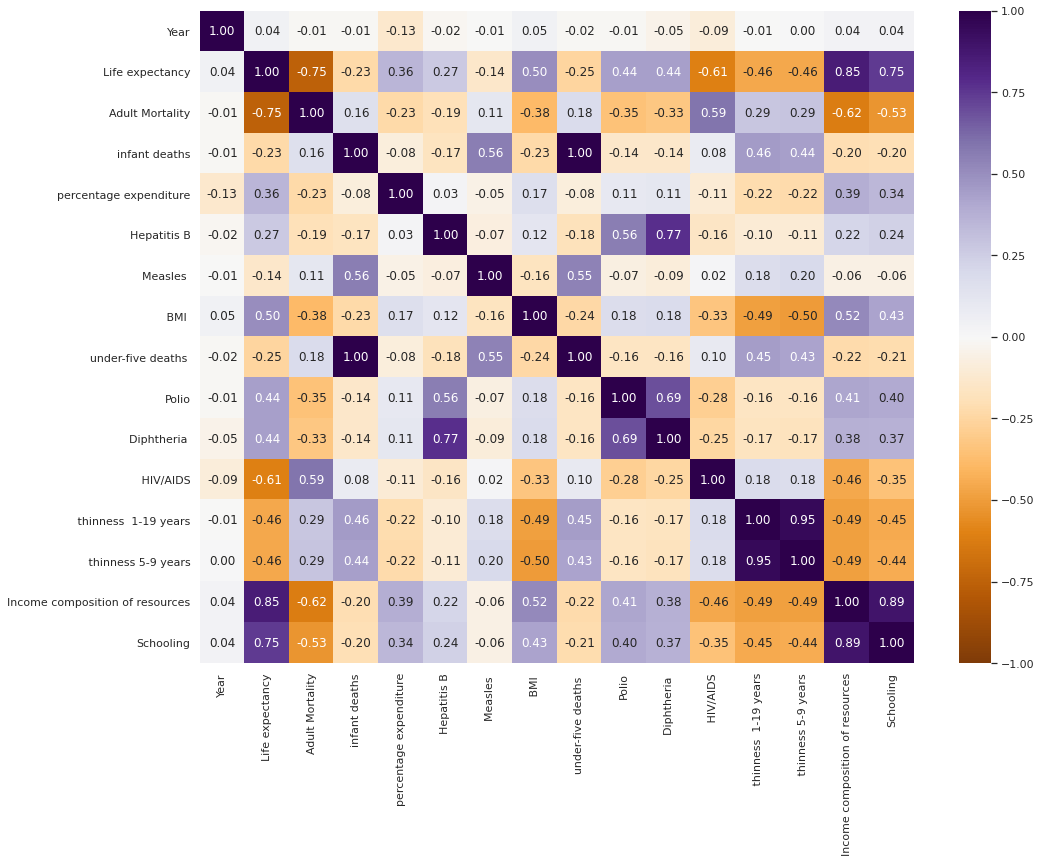

In [ ]:
corr_df = new_df.drop(['Alcohol', 'Total expenditure', 'GDP', 'Population'], axis = 1)
sns.heatmap(corr_df.corr(), cmap='PuOr', fmt='.2f', annot=True, vmin= -1,vmax= 1, center=0)

From the heatmap above, we can see that 'Income composition of resources' has the highest correlation score with respect to our target variable, 'Life expectancy'. Therefore, we select 'Income composition of resources' as our independent variable for our simple linear regression model.



In [ ]:
from sklearn.linear_model import LinearRegression as LR

In [ ]:
model = LR()
y = new_df['Life expectancy']
X1  =new_df[['Income composition of resources']]

In [ ]:
model.fit(X1, y.to_numpy().reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(f"R2 = {model.score(X1, y.to_numpy().reshape(-1,1))}")
print(f"Intercept = {model.intercept_}")
print(f"Coefficients = {model.coef_}")

R2 = 0.7255743357814533
Intercept = [38.09929716]
Coefficients = [[48.38223264]]


Our resultant simple linear regression model has an R2 score of 0.7256.

The regression line is y = 48.38223264x + 38.09929716

The graph below provides a visualisation of the regression.

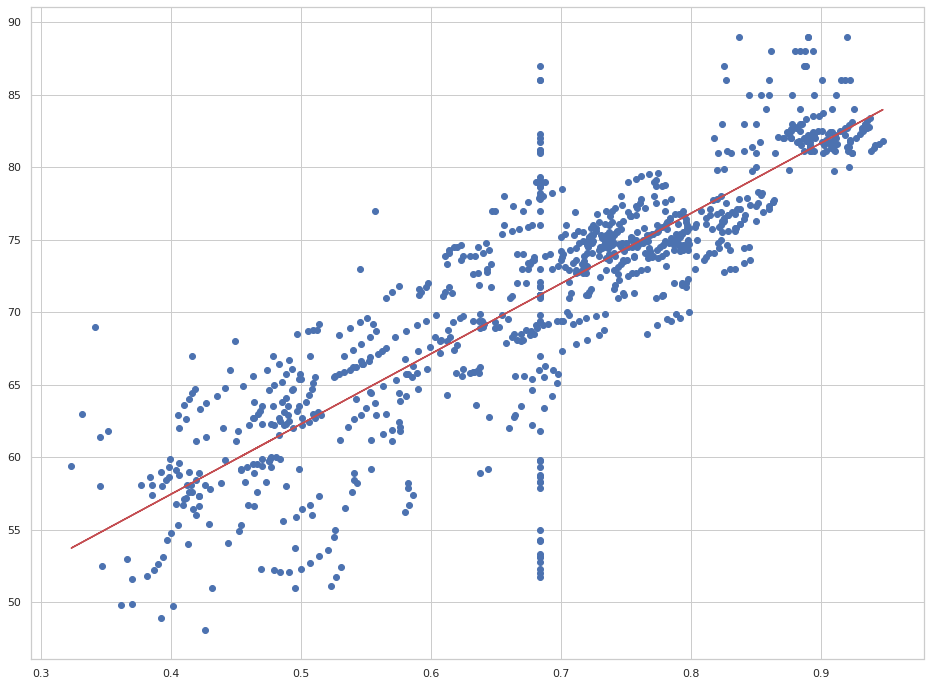

In [ ]:
# Visualizing the regression line
plot.scatter(X1, y)
plot.plot(X1, model.intercept_ + model.coef_*X1, 'r')
plot.show()

Next, we add the variable 'Adult Mortality' to form a multiple linear regression model. We choose the variable as it has the second best correlation score with respect to 'Life expectancy' of -0.75.

In [ ]:
model2 = LR()
y = new_df['Life expectancy']
X2 = new_df[['Income composition of resources', 'Adult Mortality']]

In [ ]:
model2.fit(X2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(f"R2 = {model2.score(X2, y)}")
print(f"Intercept = {model2.intercept_}")
print(f"Coefficients = {model2.coef_}")

R2 = 0.8050501567917121
Intercept = 51.22482682361327
Coefficients = [ 3.56070798e+01 -2.90314112e-02]


Our resultant multiple linear regression model has an R2 score of 0.8051, an improvement from our previous model.

The regression line is y = 35.6070798x1 - 0.0290314112x2 + 51.22482682361327, 
where x1 = Income composition of resources, x2 = Adult Mortality

The graph below provides a visualisation of the regression.

In [ ]:
fittedY=model2.predict(X2)
## convert the predicted result in an array
fittedY=np.array(fittedY)

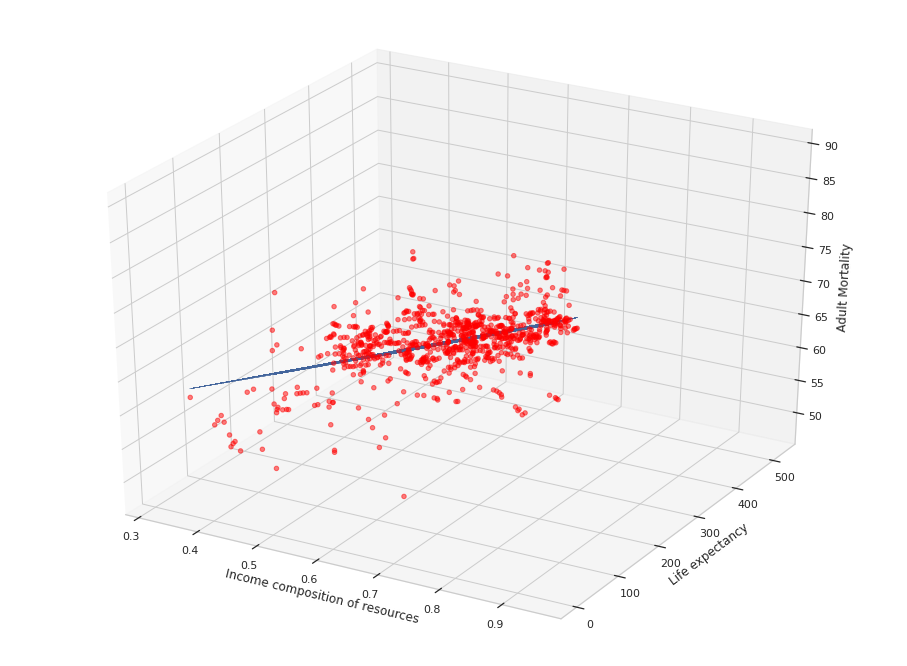

In [ ]:
fig = plot.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(new_df['Income composition of resources'],new_df['Adult Mortality'],new_df['Life expectancy'],c='red', marker='o', alpha=0.5)
ax.plot_trisurf(X2.iloc[:,0],X2.iloc[:,1],fittedY, color='b', alpha=0.3,linewidth=0, antialiased=False)
ax.set_xlabel('Income composition of resources')
ax.set_ylabel('Life expectancy')
ax.set_zlabel('Adult Mortality')
plot.show()

For our third model, we combine the previous two variables with 'Schooling' which also has one of the highest correlation scores with 'Life expectancy' at 0.75.



In [ ]:
model3 = LR()
y = new_df['Life expectancy']
X3  =new_df[['Income composition of resources', 'Adult Mortality','Schooling']]

In [ ]:
model3.fit(X3, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(f"R2 = {model3.score(X3, y)}")
print(f"Intercept = {model3.intercept_}")
print(f"Coefficients = {model3.coef_}")

R2 = 0.8052560302318204
Intercept = 51.267712581357316
Coefficients = [ 3.72885463e+01 -2.89148381e-02 -9.48325630e-02]


The third model's R2 score is 0.8053, which is quite close to the R2 score of the second model.

The regression line is y = 37.2885463x1 - 0.0289148381x2 - 0.0948325630x3 + 51.22482682361327, where x1 = Income composition of resources, x2 = Adult Mortality, x3 = Schooling


---



To compare the three models, we compute the adjusted R square scores of each model as they are nested models. Adjusted R square should increase if the variable added contributes significantly to the model.

In [ ]:
#display adjusted R-squared
adj1_r2=1 - (1-model.score(X1.to_numpy().reshape(-1,1), y.to_numpy().reshape(-1,1)))*(len(y)-1)/(len(y)-X1.shape[1]-1)
adj2_r2=1 - (1-model2.score(X2, y))*(len(y)-1)/(len(y)-X2.shape[1]-1)
adj3_r2=1 - (1-model3.score(X3, y))*(len(y)-1)/(len(y)-X3.shape[1]-1)

In [ ]:
print(adj1_r2)
print(adj2_r2)
print(adj3_r2)

0.7252770165352793
0.8046272720992863
0.8046216850534224


Consequently, we observed that the second model improves upon the first model, while the third model provides no significant additional value. 

In conclusion, the second model is the best among our models. We shall use the variables 'Income composition of resources' and 'Adult Mortality' to predict 'Life expectancy'.

In [ ]:
import statsmodels.api as sm
import itertools

X2.insert(2, "Intercept", list(itertools.repeat(51.22482682361327, 925)))
best_model = sm.OLS(y, X2).fit()


In [ ]:
best_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life expectancy   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     1904.
Date:                Sun, 12 Sep 2021   Prob (F-statistic):               0.00
Time:                        10:23:00   Log-Likelihood:                -2531.5
No. Observations:                 925   AIC:                             5069.
Df Residuals:                     922   BIC:                             5083.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Income composition of resources    35.6071      1.057     33.700      0.000      33.534      37.681
Adult Mortality                    -0.0290      0.001    -19.387      0.000      -0.032      -0.026
Intercept                           1.0000      0.017     57.537      0.000       0.966       1.034
==============================================================================
Omnibus:                      115.999   Durbin-Watson:                   0.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              367.486
Skew:                          -0.605   Prob(JB):                     1.59e-80
Kurtosis:                       5.841   Cond. No.                     1.62e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

To demonstrate a prediction, we take values around the central tendency of each of our variables as a reasonable number. We set 'Income composition of resources' to 0.65 and "Adult Mortality' to 200.

In [ ]:
values_to_predict = pd.DataFrame({'Income composition of resources' : [0.65], 'Adult Mortality' : [200], 'Intercept' : [51.22482682361327]})

In [ ]:
predictions = best_model.get_prediction(values_to_predict)
predictions.conf_int(alpha=0.05)

array([[68.29622302, 68.83006992]])

The confidence (or prediction) interval for an income composition of resources index of 0.65 and an adult mortality rate of 200 per 1000 population is (68.29622302, 68.83006992).